# Exercise 5

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Wednesday, 10/06/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * *numpy* 2d-arrays 
 * affine image transformation
 * slicing and masking or *numpy* arrays

Put in here your group number: 

Group 26

# 1. Slicing of multidimensional `numpy`-arrays (20 Points)

To practise *array-slicing* we will rearrange the excellent movie poster found on [Bonn Physik Memes on Reddit](https://www.reddit.com/r/PhysikBonnMemes/comments/dwr8zk/made_by_rinfobonnmemes/) into this:
<img src="figs/thoralf_result.jpg" style="width: 500px;">

## To get started you can use the following code:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use the matplotlib.image library to read JPG
# images (or other pixel-image a a as PNG)
# into numpy-Arrays
import matplotlib.image as mpimg

# read image into numpy-array ima
ima = mpimg.imread('Thoralf.jpg')

# show metadata of ima
print(type(ima), ima.dtype, ima.ndim, ima.shape)

<class 'numpy.ndarray'> uint8 3 (1621, 1080, 3)


In [2]:
# setting to make all plots in this notebook bigger.
# This needs to be set after a cell having '%matplotlib inline'
plt.rcParams['figure.figsize'] = (10, 10)

As you can see, the picture is represented as a 3d `numpy`-array with 8-bit precision. The resolution of $1621 \times 1080$ pixels is stored in the first two dimensions. ([0,0] is the top left corner).

The color is encoded in the third dimension, but we don't change the color in this exercise.


To print the picture with `maplotlib` use:

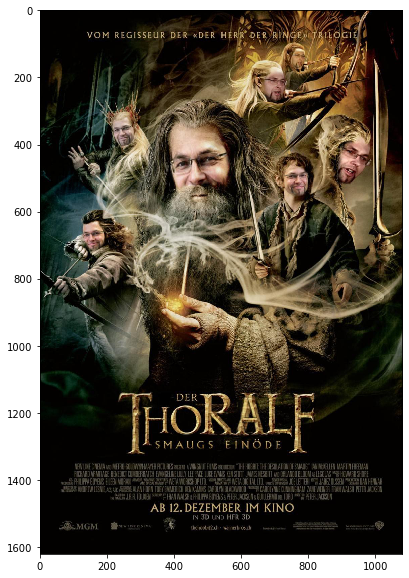

In [3]:
# show the image
plt.imshow(ima)

## Use the following hints and carefully observe the results. Experiment with it!

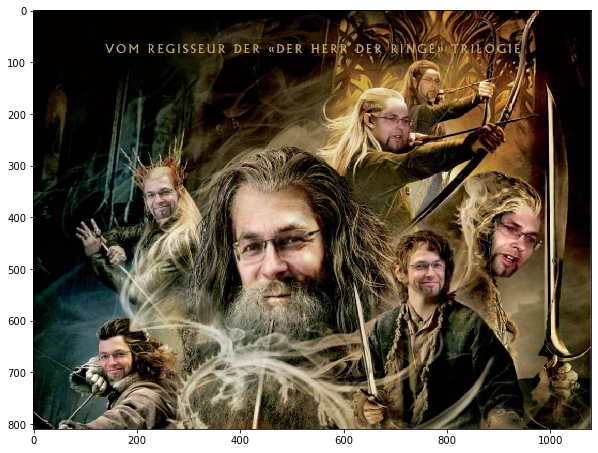

In [4]:
y_dim = ima.shape[0] # just to have a shorter name for the y-dimension
                     # of the image
x_dim = ima.shape[1]

# show upper half of image; note that the y-coordinate comes first!
upper_half = ima[:y_dim // 2,:,:]
plt.imshow(upper_half)

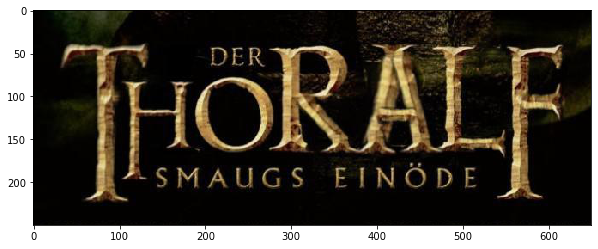

In [5]:
title = ima[1100:1350,200:850,:]
plt.imshow(title)

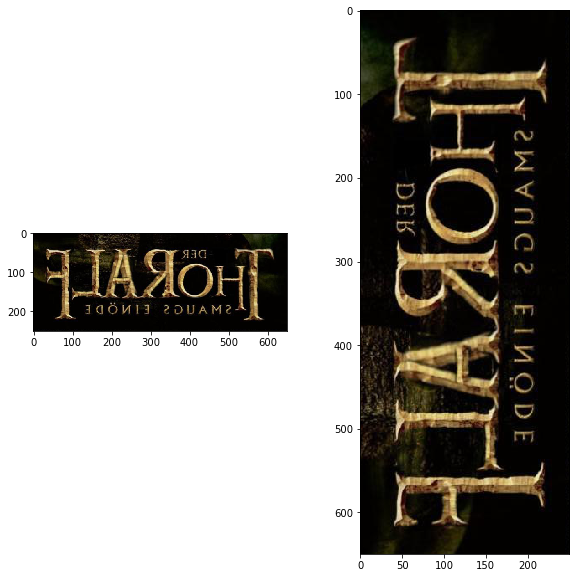

In [6]:
plt.subplot(1,2,1) # plot on the left
title_x_flip = title[:,::-1,:]  # revert x-axis
plt.imshow(title_x_flip)  

plt.subplot(1,2,2) # plot on the right
title_swap = np.swapaxes(title, 0, 1) # exchange x and y axes
plt.imshow(title_swap) 

Any sub-matices can be placed in a given position of a larger matrix. First, lets create a a large matrix and smaller matrices.

In [7]:
# create an 8x8 matrix, a 6x2 matrix
# and a transposed, modified version from the second
m = np.arange(64).reshape((8,8))
n = np.ones((2,6), m.dtype)
n_t = np.swapaxes(n, 0, 1) * 2
print(m)
print(n)
print(n_t)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


Then we can insert these sub-matrices into the main matrix.  Notice that, the shape of the sub-matrices (*i.e.* 2$\times$6) is such that the sum of width and height matches the size of the larger matrix. This is only needed if one wants to create a final matrix with all the corners replaced with sub-matricies such as our final image result.

In [8]:
# 'copy' n and n_t into the borders of m:

# the dimensions of n and n_t
x_n = n.shape[1]
y_n = n.shape[0]
x_n_t = n_t.shape[1]
y_n_t = n_t.shape[0]

# please (un)comment the following lines one after the other to see
# what is happening
m[:y_n  ,:x_n] = n
m[:y_n_t,x_n:] = n_t
m[y_n_t:,x_n_t:] = n
m[y_n:  ,:x_n_t] = n_t
print(m)

[[ 1  1  1  1  1  1  2  2]
 [ 1  1  1  1  1  1  2  2]
 [ 2  2 18 19 20 21  2  2]
 [ 2  2 26 27 28 29  2  2]
 [ 2  2 34 35 36 37  2  2]
 [ 2  2 42 43 44 45  2  2]
 [ 2  2  1  1  1  1  1  1]
 [ 2  2  1  1  1  1  1  1]]


# Code recipe

1. What is the resolution of the final picture?

2. Initialize a 3d `numpy array` named `result` with zeros and datatype `np.uint8`.

3. Copy `title` to the correct places in `result`.

4. Cut an area (any area) of the original picuture and place it in the center of `result`.

5. Save your final result as `thoralf.jpg`. Use `plt.axis('off')` to remove the axis label.

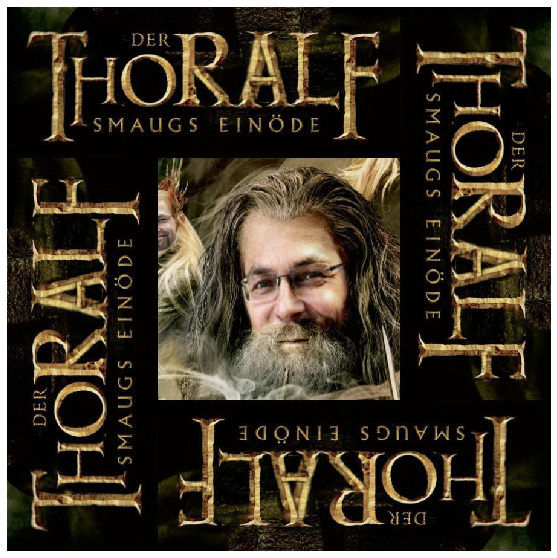

In [9]:
# YOUR CODE HERE

#dimensions of title and title_swap
y_title=title.shape[0]
x_title=title.shape[1]
y_title_swap=title_swap.shape[0]
x_title_swap=title_swap.shape[1]

#dimensions of the resulting graph
y_result=y_title+y_title_swap
x_result=x_title+x_title_swap

#initialize the array, specify shape and data type
result=np.zeros((y_result,x_result,3),dtype=np.uint8)

#put in the title at the corners
result[:y_title,:x_title,:]=title
result[:y_title_swap,x_title:,:]=title_swap[:,::-1,:]  #flip the x-axis for title_swap
result[y_title_swap:,x_title_swap:,:]=title_x_flip[::-1,:,:]  #flip the y-axis for title_x_flip
result[y_title:,:x_title_swap,:]=title_swap[::-1,:,:]  #flip the y-aixs for title_swap

#put an arbitray picture in the middle of result
result[y_title:y_title_swap,x_title_swap:x_title,:]=ima[250:(250+y_title_swap-y_title),250:(250+x_title-x_title_swap),:]

#create a figure
fig=plt.figure()

#delete axis
plt.axis('off')

#show and save graph
plt.imshow(result)
fig.savefig('thoralf.jpg')

In [10]:
#resolution of the final picture
print('resolution of the final picture is {} times {}'.format(y_result,x_result))

resolution of the final picture is 900 times 900


# 2. Image transformation with Thoralf (20 Points)

In this exercise we want to simulate a crack through the Thoralf image known from the previous exercise. We do this with the help of a random walk which was introduced in the lecture! Afterwards, we split the image at the crack location and perform transformations to it. The result should look like this:

<img src="Thoralf_cracked.png" style="width:50%;" />

Use this code as a starting point for this exercise which reads the known image and cut out the head of Thoralf:

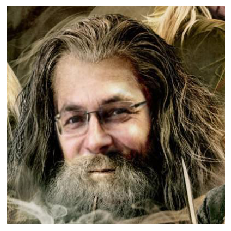

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

# read image into numpy-array ima
ima = mpimg.imread('Thoralf.jpg')

# cut out the head and put it into the image
head = ima[250:650,300:700]

plt.axis('off')
plt.imshow(head)

## Calculating a crack through an image

For calculating a crack through a given image you can use the *random walk* algorithm from the lecture. Ideally you should start in the middle of the $x$-axis of the image $x_s$. You can then do *height* times a random walk to the left or right. As you have seen in the lectures the expectation of the cumulative walk from top to bottom should be zero which means that you generate a walk around the middle line of the image. For eachrow $i$ in the image you can calculate a point $x_i$ and $y_i$ which describes the crack as the point in the random walk in the image. This calculation can easily be done with *numpy* arrays as described in the lecture.  With this array of points you can then create a mask in which you define a left and right part of the crack line. For this you can define a boolean array with the same shape as the image with ```False``` as a start. Then you can set all points right of the crack points (including the crack points themselves) to ```True```. Using this mask you can seperate the starting image into a left and right image. Make a copy of the initial image and sets all pixels which are not belonging to the left part to ```0```. 

## Affine Image transformation 

Affine image transformation are typical for image manipulation and can be easily described by linear algebra mathematics. The transformation includes, translation, rotation and shear. Assume a point $P$ written as a vector:
$$ P = \begin{pmatrix} x \\ y \\\end{pmatrix}$$
You can transform $P$ into $P'$ with this affine transformation:

$$ P' = \begin{pmatrix} x' \\ y' \\\end{pmatrix} = \begin{pmatrix} a & b \\ c & d \\ \end{pmatrix} P +  \begin{pmatrix} e \\ f \\\end{pmatrix} $$

The matrix $$ R = \begin{pmatrix} a & b \\ c & d \\ \end{pmatrix} $$ describes the rotation and shear part of the affine transformation. 

The vector $$ o = \begin{pmatrix} e \\ f \\\end{pmatrix} $$ is the translation which is done after the rotation and shear was applied.

In this exercise we only focus on a simple rotation in which the rotation matrix can be written as:

$$ R = \begin{pmatrix} \cos \alpha & -\sin \alpha \\ \sin \alpha & \cos \alpha \\ \end{pmatrix} $$ in which $\alpha$ is the rotation angle. 

Applying the affine transformation on images can be done pixel wise. Each pixel in the source image has a $x$ and $y$ coordinate which you can transform into a $x'$ and $y'$ coordinate in the destination image. Then you need to transfer only the values from the source into the destination image. However, since we have discrete pixel coordinates as integer numbers the destination coordinates are normally integer values anymore. You can force these coordinates be integers as well but in most cases you will create a destination image which have pixels which are not related to any pixels of the source image. To prevent this behaviour we can do the coordinate transformation in another way. We can go to the destination image and can go through all pixel coordinates $x'$ and $y'$, using the invers affine transformation and calculates the $x$ and $y$ corrdinates of the source image and then copying the values. With these algorithm we can guarantee that all pixels of the destination image have a value. 

So instead of calculating $x'$ and $y'$ we then have a transformation for $x$ and $y$:

$$ \begin{pmatrix} x \\ y \end{pmatrix} = R^t \begin{pmatrix} x' \\ y' \end{pmatrix}$$

In numpy you can get the tranposed matrix from a two dimensional array $R$ with ```R.T```!

For doing affine transformations we can use the *ndimage* module of the *scipy* library. Please always load this module with ```import scipy.ndimage as img```. The following codes explain the transformation, starting with a simple translation:

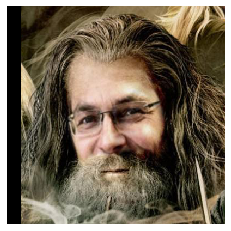

In [12]:
import scipy.ndimage as img

# just to test the affine_transformation function from the ndimage-module.
# A shift of tne image by 25 pixels. Note that we need to give
# the negative transformation to affine_transformation. This coincides with what
# Olli told me.
I = np.eye(3)
o = np.array([0, -25, 0])

# perform the transformation
new_image = img.affine_transform(head, matrix=I.T, offset=o)   # use the transposed matrix, 
                                                               # even not necessary, because in
                                                               # this case I.T = I !

plt.axis('off')
plt.imshow(new_image)

First of all we are using ```img.affine_transform``` which returns the transformation of the image given by the first argument. *affine_transform* creates a new image! The other arguments are the rotation matrix *matrix* and the translation offset *offset*. The rotation maxtrix a 2 dimensional *numpy* array with the shape ```3x3```, which reflects the shape of the source image which is a 3d array! The translation vector is a 1d *numpy* array. As you can see in the example *affine_transform* need a invers transformation which means for the translation a shift with negative values. For our image transformation we actually need only the first two values of the translation and the left ```2x2``` part of the rotation matrix. The other values will transform the colour of the image which is not wanted in this exercise.

A sample mirroring at the $x$- and $y$-axis (a rotation of 180 degrees) can be implemented with a matrix:

$$ R = \begin{pmatrix} -1 & 0 \\ 0 & -1 \\ \end{pmatrix} $$ 

As described before we need 


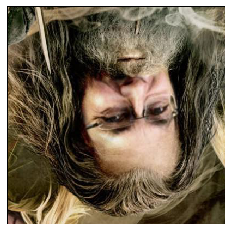

In [13]:
import scipy.ndimage as img

# setup a rotation matrix with an angle of 180 degrees
I = np.array([[-1,0,0],[0,-1,0],[0,0,1]])

# calculate the offset manually
o = np.array([head.shape[0], head.shape[1], 0])

# perform the transformation
new_image = img.affine_transform(head, matrix=I.T, offset=o)

plt.axis('off')
plt.imshow(new_image)

You can see, that the image is rotated by 180 degrees. For getting this result we needed to define a special offset otherwise we eill create an empty image. The reason is that rotations in affine transformations are done around $P = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$. In the case of the 180 degrees rotation we need to shift the whole image in $x$ and $y$ direction exactly with the $x$- and $y$-size of the image. 

If you want to rotate the image around $T = \begin{pmatrix} t_x \\ t_y \end{pmatrix}$ you can shift the image by $-T$ which means that the rotation point is now at $\begin{pmatrix} 0 \\ 0 \end{pmatrix}$. The the rotation is applied and the resulting image will be shifted back with the same shift $T$. For any point we can write the affine transformation now as:

$$ \begin{pmatrix} x' \\ y' \end{pmatrix} = R \bigg[ \begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} t_x \\ t_y \end{pmatrix}  \bigg] +  \begin{pmatrix} t_x \\ t_y \end{pmatrix} $$

isolating the terms of the previous affine transformation will give:

$$ \begin{pmatrix} x' \\ y' \end{pmatrix} = R \begin{pmatrix} x \\ y \end{pmatrix} + \begin{pmatrix} t_x \\ t_y \end{pmatrix} -  R \begin{pmatrix} t_x \\ t_y \end{pmatrix}$$

the rest of the equation can be written as a modified translation:
$$T' = \begin{pmatrix} t_x' \\ t_y' \end{pmatrix} = \begin{pmatrix} t_x \\ t_y \end{pmatrix} -  R \begin{pmatrix} t_x \\ t_y \end{pmatrix}$$.

This modified translation can be calculated with the *np.dot*-function. Originally *np.dot* is used to calculate the dot-product of two one-dimensional arrays (don't mix this up with the elementwise multiplication with the ```*```-operator!). This function can also be used for multiplying a matrix with a one-dimensional array. The first argument is the matrix and the second argument is the array! 

Using this we can change the example rotation, which should be done around the center of the image:

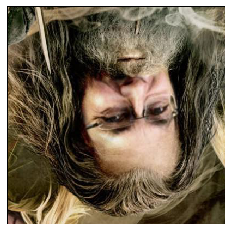

In [14]:
import scipy.ndimage as img

# setup a rotation matrix with an angle of 180 degrees
I = np.array([[-1,0,0],[0,-1,0],[0,0,1]])

o = np.array([head.shape[0] /2, head.shape[1] /2 , 0])  # rotate around the center point of the image

o = o - np.dot(I, o)  # calculate the modified translation

# perform the transformation
new_image = img.affine_transform(head, matrix=I.T, offset=o)

plt.axis('off')
plt.imshow(new_image)

# Code recipe

Now you can do all the steps to add a crack to the *head* image and rotate the right image by an angle of 10 degrees

1. define a list of points describing the crack through the image, define a function *get_crack_coordinates* which takes the image as an argument and returns two arrays $x$ and $y$ with the points of the calculated crack
2. split the image in a left and a right image, define a function *split_image* which takes the image and the points of the crack as arguments and returns the left and right image
3. apply a affine transformation on the right image in which you rotate the image by an angle of 10 degrees to the right, the rotation point should be the lowest point of the crack 
4. combine the left image and the transformed right image back into one image and plot this image

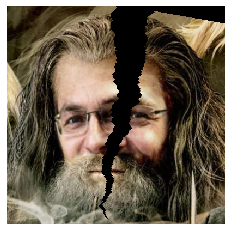

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import scipy.ndimage as img

# read image into numpy-array ima
ima = mpimg.imread('Thoralf.jpg')

# cut out the head and put it into the image
head = ima[250:650,300:700]

plt.axis('off')

# YOUR CODE HERE

#define a function that takes a image and output a crack
def get_crack_coordinates(image):
    
    #the y-coordinate of the crack is just the y-index of the image
    y=np.arange(image.shape[0])
    
    #generate random 0 and 1 with size of (the x-dimension of the image -1)
    steps=np.random.randint(0,2,size=(image.shape[0]-1))
    
    #change 0 to -1
    steps[steps==0]=-1
    
    #put the first x-value, namely the middle of the graph, in front of the random array
    steps=np.concatenate(([image.shape[1]//2],steps))
    
    #cumulated steps
    x=steps.cumsum()
    
    #return coordinates
    return x,y

#call the function for head
x,y=get_crack_coordinates(head)

#define a funtion which takes a image and a crack and splits the graph into left and right
def split_image(image,x,y):
    
    #initialize mask with the shape of the image, all False
    mask=np.zeros(shape=image.shape,dtype=bool)
    
    #set elements right to the crack to be True
    for i in y:
        mask[i,x[i]:,:]=True
        
    #generate the left part by assigning 0 when mask is True, the image value when mask is False
    left=np.where(mask,0,image)
    
    #generate the right part by doing the exact opposite
    right=np.where(mask,image,0)
    
    #output left and right parts
    return left,right

#call the function with head and the calculated crack
left,right=split_image(head,x,y)

#define the angle in radians
angle=-10*np.pi/180

# setup a rotation matrix with an angle of 10 degrees to the right
I = np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])

o = np.array([y[-1],x[-1], 0])  # rotate around the botton point of the crack

o = -np.dot(I.T,o - np.dot(I, o))   # calculate the modified translation

# perform the transformation
rotated = img.affine_transform(right, matrix=I.T, offset=o)

#put the left part and the rotated part together by using np.where() function
rotated=np.where(left,left,rotated)

#delete axis
plt.axis('off')

#show graph
plt.imshow(rotated)
    
    

# 2. 1d - Thermal conduction (20 Points)

In this exercise we want to simulate the thermal conduction for a simple, 1-dimensional metal stick. For this case we assume a stick of the length 1 and a heat distribution $u(x,t)$. <br> 
Assume that, initially the heat is set by function $u(x,0)$ which has the boundary condition $u(0,t) = u(1,t) = 0$. 
Given the initial conditions and the condition that the heat is only allowed to be transferred in and out of the stick at the ends, we want to compute the time evolution of this conduction.

The thermal distribution can be then given for $0 < x < 1$ and $t>0$ with the heat equation:

$$\frac{\partial u }{\partial t} = \kappa^2 \frac{\partial^2 u}{\partial x^2} $$

with a thermal conduction coefficient $\kappa^2 > 0$. 

Of course for this problem there are well known analytic solutions, we want to use this special initial condition $u(x,0) = \sin(\pi x)$ for which the analytical solution is:
$$u(x,t) = \sin(\pi x) \textrm{e}^{-\kappa^2 \pi^2 t}$$. 

However, we want to focus on a numerical solution which replaces the stick with a vector of discrete parts. 

Assume that we can split the interval $[0,1]$ in $N$ discrete parts with a length of $h=1/N$. For $h\rightarrow0$ our solution will approach to the exact solution. 

Now we want to compute the second derivative of the spatial part, $u'' = \frac{\partial^2 u}{\partial x^2}$ using a discrete function $u_i$ for $i=0...N-1$. Following the formula introduced in the lecture one can compute the first derivative ( $u' = \partial u/\partial x$) by:

$${u'}_{i+1/2} \approx \frac{u_{i+1}-u_{i}}{h}$$ and
$${u'}_{i-1/2} \approx \frac{u_{i}-u_{i-1}}{h}$$

for a the middle of two discrete points. Doing the same thing again, we get:

$${u''}_{i} \approx \frac{u_{i-1}-2 u_i + u_{i+1}}{h^2} $$

For the simulation we can also discretize the time in the first equation:

$$ u_{t+\Delta t} = u_{t} + \Delta t \cdot \kappa^2 {u''_i} $$ Finally, for a discrete point $i$ on the stick:

$$ u_{t+\Delta t,i} = u_{t,i} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1}-2 u_{t,i} + u_{t,i+1}}{h^2} $$

The boundary conditions are now $u_{0,t} = u_{N-1,t} = 0 $. 

**Your task**:

Your task is to implement a simulation (re-evaluation of the values at different time steps) of a metal stick using a *numpy* array with $N$ elements. You should setup the initial condition $u(x,0) = \sin(\pi x)$ on the interval $x = [0,1]$ and prove that we can reproduce the exact solution $(x,t) = \sin(\pi x) \textrm{e}^{-\kappa^2 \pi^2 t}$. This proof can be simplified by dividing the current values of the array by the initial condition and compare this with the exponential part of the solution. 

Use this algorithm for the task:
 * How do you expect the mean temperature of the stick to behave in time?
 * Define a 1d, float heat grid with $N=20$ elements as a *numpy* array for the stick. This is your array at ```t=0```, modify it accordingly!
 * Define an *update_time* function which takes the heat grid, a *kappa* and a *deltat* as input arguments calculates the new values for the array from the given formulars directly on array. Therefore, the function does not need to return any special value!
 * Do the simulation 1000 times, use $\kappa = 1$ and $\Delta t = 0.001$. At each step the resultant array should be normalized with the intial array by a simple division.
 * Only keep track of the mean values of the heat array at each step to consider the behaviour of the mean temperature in time.
 * Plot the previously calculated means against the number of the simulation, plot the exact solution over your simulated data.
 * Plot the difference between your simulation and the exact solution (residual plot).
 * Repeat the simulation for 100 and 10000 timesteps. Discuss the results.
 
**Notes**:

 * the limit of these kind of simulations is $\Delta t < h^2/2\kappa^2$. For either larger values of $\kappa$ or for the timesteps $\Delta t$  the simulation diverges and gives unexpected results. You can simply see, that with $\Delta t > h^2/2\kappa^2$ the values which will be added in every step is $>0$ whereas with smaller $\Delta t$ values the total values will get smaller.
 * use *np.mean* for calculating the mean value, beware of the boudaries if you divide the current array with the initial condition


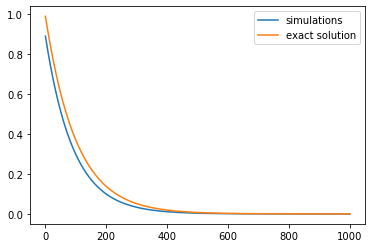

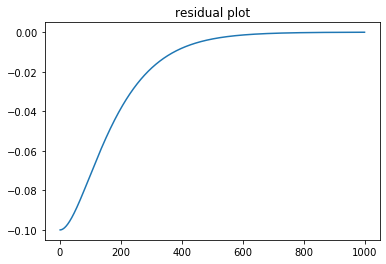

In [16]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

# YOUR CODE HERE

#I expect the mean temperature of the stick to decrease exponentially in time. 

#initialize N
N=20

#divide [0,1] into N parts and apply the sin funtion
grid_initial=np.sin(np.pi*np.linspace(0,1,N))

#define a function with take a grid, kappa, deltat and outputs an updated grid WITHOUT the boundary values
def update_time(grid,kappa,deltat):
    
    #eliminate the boundary values
    grid_middle=np.delete(grid,[0,N-1])
    
    #eliminate the last two elements
    grid_minus=np.delete(grid,[N-2,N-1])
    
    #eliminate the first two elements
    grid_plus=np.delete(grid,[0,1])
    
    #calculate the updated grid without the boundary
    grid_middle=grid_middle+deltat*(kappa**2)*(grid_minus-2*grid_middle+grid_plus)*(N**2)
    
    #return an updated grid without the boundary
    return grid_middle

#make a copy of the initial value
grid=grid_initial

#initial grid without the boundary value so that it can be used as denominator
initial=np.delete(grid_initial,[0,N-1])

#initialize an array to store mean values
mean=np.zeros(1000)

#do the simulations 1000 times
for i in range(1000):
    
    #call the update function
    grid=update_time(grid,1,0.001)
    
    #divide by the inital grid
    new=grid/initial
    
    #calculate mean by using np.sum(). This is necessary because we need to take into account the boundary values.
    #the array 'new' has only 18 elements, but we need to average over 20 elements. So np.sum() is better than np.mean().
    mean[i]=np.sum(new)/N
    
    #add back the boundary values to prepare for the next update
    grid=np.insert(grid,0,0)
    grid=np.append(grid,0)

#create an array to store the number of times we did the simulations
number=np.linspace(1,1000,1000)

#plot the mean against the number of updates.
p1=plt.plot(number,mean,label='simulations')

#calculate the exact solution
exact=np.exp(-np.pi**2*0.001*number)

#plot the exact solution
p2=plt.plot(number,exact,label='exact solution')

#plot legend and show the two together
plt.legend()
plt.show(p1,p2)

#plot residue
p3=plt.plot(number,mean-exact)

#add title and show the residual plot in a new figure
plt.title('residual plot')
plt.show(p3)

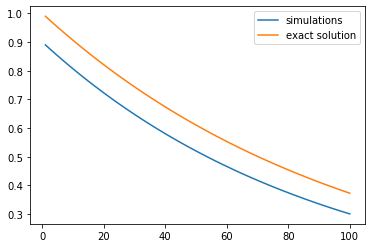

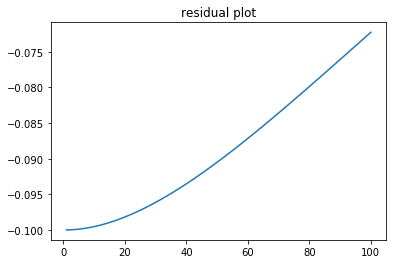

In [17]:
#do exactly the same thing for 100 simulations

#make a copy of the initial value
grid=grid_initial

#initial grid without the boundary value so that it can be used as denominator
initial=np.delete(grid_initial,[0,N-1])

#initialize an array to store mean values
mean=np.zeros(100)

#do the simulations 100 times
for i in range(100):
    
    #call the update function
    grid=update_time(grid,1,0.001)
    
    #divide by the inital grid
    new=grid/initial
    
    #calculate mean by using np.sum(). This is necessary because we need to take into account the boundary values.
    #the array 'new' has only 18 elements, but we need to average over 20 elements. So np.sum() is better than np.mean().
    mean[i]=np.sum(new)/N
    
    #add back the boundary values to prepare for the next update
    grid=np.insert(grid,0,0)
    grid=np.append(grid,0)

#create an array to store the number of times we did the simulations
number=np.linspace(1,100,100)

#plot the mean against the number of updates.
p1=plt.plot(number,mean,label='simulations')

#calculate the exact solution
exact=np.exp(-np.pi**2*0.001*number)

#plot the exact solution
p2=plt.plot(number,exact,label='exact solution')

#plot legend and show the two together
plt.legend()
plt.show(p1,p2)

#plot residue
p3=plt.plot(number,mean-exact)

#add title and show the residual plot in a new figure
plt.title('residual plot')
plt.show(p3)

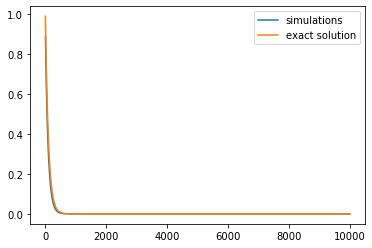

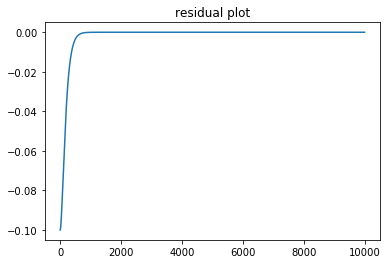

In [18]:
#do exactly the same thing for 10000 simulations

#make a copy of the initial value
grid=grid_initial

#initial grid without the boundary value so that it can be used as denominator
initial=np.delete(grid_initial,[0,N-1])

#initialize an array to store mean values
mean=np.zeros(10000)

#do the simulations 10000 times
for i in range(10000):
    
    #call the update function
    grid=update_time(grid,1,0.001)
    
    #divide by the inital grid
    new=grid/initial
    
    #calculate mean by using np.sum(). This is necessary because we need to take into account the boundary values.
    #the array 'new' has only 18 elements, but we need to average over 20 elements. So np.sum() is better than np.mean().
    mean[i]=np.sum(new)/N
    
    #add back the boundary values to prepare for the next update
    grid=np.insert(grid,0,0)
    grid=np.append(grid,0)

#create an array to store the number of times we did the simulations
number=np.linspace(1,10000,10000)

#plot the mean against the number of updates.
p1=plt.plot(number,mean,label='simulations')

#calculate the exact solution
exact=np.exp(-np.pi**2*0.001*number)

#plot the exact solution
p2=plt.plot(number,exact,label='exact solution')

#plot legend and show the two together
plt.legend()
plt.show(p1,p2)

#plot residue
p3=plt.plot(number,mean-exact)

#add title and show the residual plot in a new figure
plt.title('residual plot')
plt.show(p3)

In [19]:
#discussion: after 100 steps the grid hasn't reached equilibrium, while it has long reached equilibrium after 10000 steps.
#after equilibrium, both the residual value and the grid temperature remain steadily zero. 